In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os

from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]
En_h = alpha**2.0 * m_e * c**2.0;
scl = c*10**-9 * En_h /(h * c);

In [6]:
# In an electric field (with B=0)
# quantum numbers
nmin = 10
nmax = 11
S = 1
field_orientation = 'parallel'

m_vals = np.array([0,1,2])
n_vals, L_vals, J_vals, neff, En, H_0, mat_S = [], [], [], [], [], [], []

for m_val in m_vals:
    n_vals_tmp, L_vals_tmp = get_nl_vals(nmin, nmax, m_val)
    J_vals_tmp = get_J_vals(S, L_vals_tmp, diff=1)
    # quantum defects
    neff_tmp = n_vals_tmp - get_qd(S, n_vals_tmp, L_vals_tmp, J_vals_tmp)
    # energy levels
    En_tmp = W_n(S, n_vals_tmp, L_vals_tmp, J_vals_tmp)
    # field-free Hamiltonian
    H_0_tmp = np.diag(En_tmp)
    # find the off-diagonal terms of the Stark interaction matrix
    mat_S_tmp = stark_matrix_select_m(n_vals_tmp, neff_tmp, L_vals_tmp, m_val, field_orientation, dm_allow=[0])
    
    # Save each m variable into arrays
    n_vals.append(n_vals_tmp)
    L_vals.append(L_vals_tmp)
    J_vals.append(J_vals_tmp) 
    neff.append(neff_tmp) 
    En.append(En_tmp) 
    H_0.append(H_0_tmp)
    mat_S.append(mat_S_tmp)

calculate Stark terms: 100%|██████████████████| 17/17 [00:00<00:00, 999.95it/s]


In [7]:
# In an electric field (with B=0)
# quantum numbers
n_vals_all_m, L_vals_all_m, m_vals_all_m = get_nlm_vals(nmin, nmax)
J_vals_all_m = get_J_vals(S, L_vals_all_m, 1)
# quantum defects
neff_all_m = n_vals_all_m - get_qd(S, n_vals_all_m, L_vals_all_m, J_vals_all_m)
# find the off-diagonal terms of the Stark interaction matrix
mat_S_all_m = stark_matrix(n_vals_all_m, neff_all_m, L_vals_all_m, m_vals_all_m, field_orientation=field_orientation, dm_allow=[0,-1,+1])

calculate Stark terms: 100%|█████████████████| 221/221 [00:02<00:00, 84.56it/s]


In [332]:
#mat_S[1] * (e*a_0) * 1e28

In [333]:
#En[1]*En_h

In [334]:
# specify the electric field
field = np.linspace(0.00, 10**7, 501) # V /cm
field_au = field * 100 / (En_h_He/(e*a_0_He))
# specify the magnetic field (in Telsa)
B_z = 1.6154E-3
# (in atomic units)
B_z_au = B_z / (hbar/(e*a_0_He**2))

# diagonalise for each field
eig_vals, eig_vecs = [], []
for m_idx, m_val in enumerate(m_vals):
    # Zeeman interaction Hamiltonian
    H_Z = np.diag(E_zeeman(np.ones_like(n_vals[m_idx])*m_val, B_z_au))
    eig_vals_tmp, eig_vecs_tmp = stark_map_vec(H_0[m_idx], mat_S[m_idx], field_au, H_Z=0)
    eig_vals.append(eig_vals_tmp)
    eig_vecs.append(eig_vecs_tmp)

diagonalise Hamiltonian: 100%|████████████| 501/501 [00:00<00:00, 31311.04it/s]


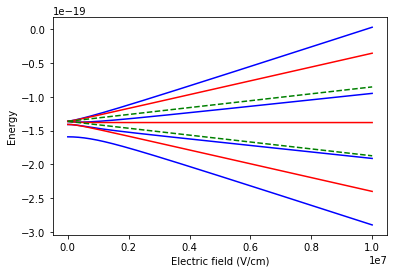

In [335]:
plt.plot(field, eig_vals[0]*En_h, 'b', label='m=0')
plt.plot(field, eig_vals[1]*En_h, 'r', label='m=1')
plt.plot(field, eig_vals[2]*En_h, '--g', label='m=2')
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Energy')

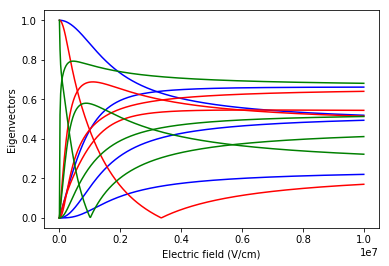

In [336]:
plt.plot(field, np.abs(eig_vecs[0][:,:,0]), 'b', label='m=0')
plt.plot(field, np.abs(eig_vecs[0][:,:,1]), 'r', label='m=1')
plt.plot(field, np.abs(eig_vecs[0][:,:,2]), 'g', label='m=1')
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Eigenvectors')

In [337]:
#print(eig_vals[0][60]*En_h*10**18)
#print(-eig_vecs[0][60,:,:])

## Transition dipole moment between two states

In [338]:
print(n_vals)
print(L_vals)
print(m_vals)

[array([4, 4, 4, 4]), array([4, 4, 4]), array([4, 4])]
[array([0, 1, 2, 3]), array([1, 2, 3]), array([2, 3])]
[0 1 2]


In [339]:
print(n_vals_all_m)
print(L_vals_all_m)
print(m_vals_all_m)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[0 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3]
[ 0 -1  0  1 -2 -1  0  1  2 -3 -2 -1  0  1  2  3]


In [340]:
#m_i = 0
#m_f = 0
#idx_m_i_all_m = np.where(m_vals_all_m==m_i)[0]
#idx_m_f_all_m = np.where(m_vals_all_m==m_f)[0]
#np.shape(mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m])

From state:	 n = 4 , l = 0 , m = 0
To state:	 n = 4 , l = 1 , m = 1


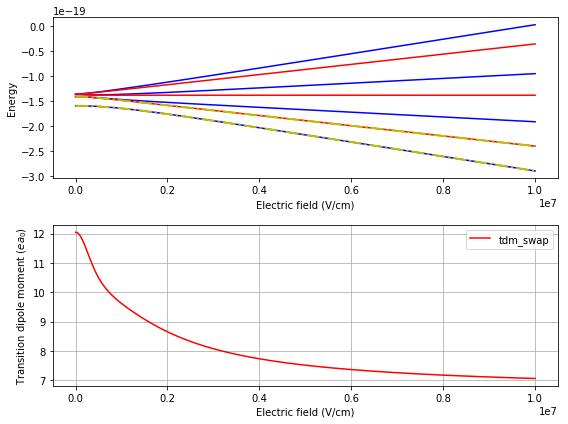

In [348]:
state_i = 0
state_f = 0
m_i = 0
m_f = 1

idx_m_i = np.where(m_vals==m_i)[0][0]
idx_m_f = np.where(m_vals==m_f)[0][0]
idx_m_i_all_m = np.where(m_vals_all_m==m_i)[0]
idx_m_f_all_m = np.where(m_vals_all_m==m_f)[0]

#tdm = []
#tdm_2 = []
tdm_swap = []
#tdm_swap_2 = []
for i, f in enumerate(field):
    #weights = ( np.outer( eig_vecs[idx_m_i][i,state_i,:], eig_vecs[idx_m_f][i,state_f,:] ) )
    #weights_2 = np.abs( np.outer( eig_vecs[idx_m_i][i,state_i,:], eig_vecs[idx_m_f][i,state_f,:] ) )
    #tdm.append( np.abs( np.sum( weights * mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m] ) ) )
    #tdm_2.append( np.abs( np.sum( weights_2 * mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m] ) ) )
    
    weights_swap = ( np.outer( eig_vecs[idx_m_i][i,:,state_i], eig_vecs[idx_m_f][i,:,state_f] ) )
    #weights_swap_2 = np.abs( np.outer( eig_vecs[idx_m_i][i,:,state_i], eig_vecs[idx_m_f][i,:,state_f] ) )
    tdm_swap.append( np.abs( np.sum( weights_swap * mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m] ) ) )
    #tdm_swap_2.append( np.abs( np.sum( weights_swap_2 * mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m] ) ) )
    
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 2)
#plt.plot(field, tdm, '--b', label='tdm')
#plt.plot(field, tdm_2, '--g', label='tdm_2')
plt.plot(field, tdm_swap, 'r', label='tdm_swap')
#plt.plot(field, tdm_swap_2, '--y', label='tdm_swap_2')
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Transition dipole moment ($ea_0$)')
plt.grid()
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(field, eig_vals[0]*En_h, 'b', label='m=0')
plt.plot(field, eig_vals[1]*En_h, 'r', label='m=1')
plt.plot(field, eig_vals[idx_m_i][:,state_i]*En_h, '-.y', lw=2)
plt.plot(field, eig_vals[idx_m_f][:,state_f]*En_h, '-.y', lw=2)
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Energy')
plt.tight_layout()

print('From state:\t n =', n_vals[idx_m_i][state_i], ', l =', L_vals[idx_m_i][state_i], ', m =', m_vals[idx_m_i])
print('To state:\t n =', n_vals[idx_m_f][state_f], ', l =', L_vals[idx_m_f][state_f], ', m =', m_vals[idx_m_f])

In [312]:
all_m_i = np.intersect1d( np.intersect1d( np.where(n_vals_all_m==n_vals[idx_m_i][state_i]),
                                          np.where(L_vals_all_m==2) ), 
                                          np.where(m_vals_all_m==m_vals[idx_m_i]) )
all_m_f = np.intersect1d( np.intersect1d( np.where(n_vals_all_m==n_vals[idx_m_f][state_f]),
                                          np.where(L_vals_all_m==1) ), 
                                          np.where(m_vals_all_m==m_vals[idx_m_f]) )
mat_S_all_m[all_m_i, all_m_f]

array([], dtype=float64)

In [262]:
print(n_vals_all_m[idx_m_f_all_m])
print(L_vals_all_m[idx_m_f_all_m])
print('---')
print(n_vals_all_m[idx_m_i_all_m])
print(L_vals_all_m[idx_m_i_all_m])

count=0
for a in L_vals_all_m[idx_m_f_all_m]:
    for b in L_vals_all_m[idx_m_i_all_m]:
        if np.abs(a-b)==1:
            count += 1
print(count)

[3 3 4 4 4 5 5 5 5]
[1 2 1 2 3 1 2 3 4]
---
[3 3 3 4 4 4 4 5 5 5 5 5]
[0 1 2 0 1 2 3 0 1 2 3 4]
43


In [164]:
i=10
weights = np.abs( np.outer( eig_vecs[idx_m_i][i,state_i,:], eig_vecs[idx_m_f][i,state_f,:] ) )
pre_sum = weights * mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m]
print(np.sum(np.abs(pre_sum)>0))
mat_S_all_m[idx_m_i_all_m,:][:,idx_m_f_all_m]

3


array([[-6.4846716 ,  0.        ],
       [ 0.        , -4.53385205],
       [ 2.6176207 ,  0.        ]])

In [165]:
i = 10
eig_vecs[idx_m_i][i,state_i,:]

array([-0.99971738, -0.0237197 ,  0.00159314])

In [166]:
mat_S_all_m[1]

array([ 6.4846716 ,  0.        ,  0.        ,  0.        ,  6.41183505,
        4.53385205, -2.6176207 ,  0.        ,  0.        ])

In [167]:
print(n_vals_all_m)
print(L_vals_all_m)
print(m_vals_all_m)

[3 3 3 3 3 3 3 3 3]
[0 1 1 1 2 2 2 2 2]
[ 0 -1  0  1 -2 -1  0  1  2]


In [168]:
np.sum(mat_S_all_m[np.where(L_vals_all_m==1)[0],:][:,np.where(L_vals_all_m==2)[0]]>0)

6

In [169]:
np.sum(mat_S_all_m>0)

16

## Old method

In [31]:
field_orientation, dm_allow, step = 'parallel', [0], 0.005
m_i, m_f = 0, 0

m_idx_i, m_idx_f = np.where(m_vals==m_i)[0][0], np.where(m_vals==m_f)[0][0]
tm = []
for idx_i, L_val_i in enumerate(L_vals[m_idx_i]):
    for idx_f, L_val_f in enumerate(L_vals[m_idx_f]):
        if ( np.abs(L_val_i - L_val_f) == 1 ):
            #print(L_val_i, L_val_f)
            tm.append([0,0,0]) 
            tm[len(tm)-1][0] = L_val_i
            tm[len(tm)-1][1] = L_val_f
            tm[len(tm)-1][2] = stark_int(neff[m_idx_i][idx_i], neff[m_idx_f][idx_f], L_val_i, L_val_f, m_i, m_f, field_orientation, dm_allow, step)
tm = np.array(tm)

[ -9.99997167e-01   2.37826872e-03  -1.60379371e-05  -6.55056832e-07
  -8.85086599e-05  -3.33271507e-06  -1.91607080e-06  -1.59238438e-06
  -3.89821769e-05  -3.43604581e-06   2.90543557e-06  -2.25974418e-06]


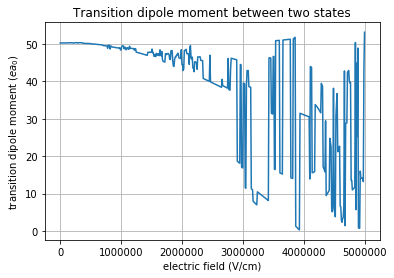

In [32]:
state_i = 0
state_f = 1

I = np.zeros(len(field))
for k, F in enumerate(field):
    
    Vi = eig_vecs[m_idx_i][k, state_i, :]
    Vf = eig_vecs[m_idx_f][k, state_f, :]
    
    if (k==2): print(Vi); 
    
    for from_i in range(len(Vi)):
        for to_i in range(len(Vf)):    
            if np.abs(L_vals[m_idx_i][from_i] - L_vals[m_idx_f][to_i]) == 1: 
                for tm_i in range(len(tm[:,0])):
                    if (tm[tm_i,0] == L_vals[m_idx_i][from_i]) and (tm[tm_i,1] == L_vals[m_idx_f][to_i]):
                        I[k] += (Vi[from_i] * Vf[to_i] * np.abs(tm[tm_i,2]));
                        
plt.plot(field, np.abs(I))
plt.grid()
plt.xlabel('electric field (V/cm)')
plt.ylabel('transition dipole moment ($e a_0$)')
plt.title('Transition dipole moment between two states')